# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [4]:
df = pd.read_csv("train.csv")

# Displaying the data

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking for null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Heatmap to display null values

<Axes: >

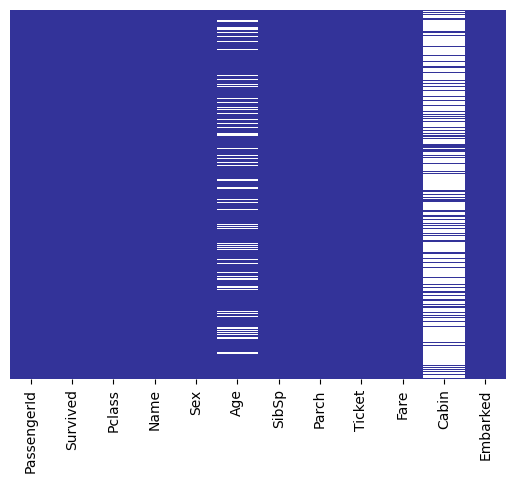

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='terrain')

# Countplots

<Axes: xlabel='Survived', ylabel='count'>

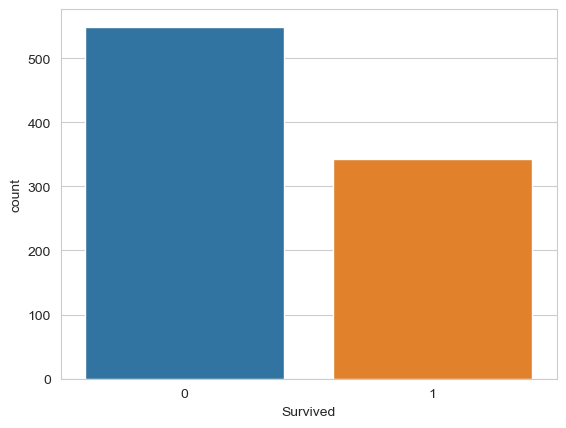

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

More than 500 didnt survive
More than 300 survive

<Axes: xlabel='Survived', ylabel='count'>

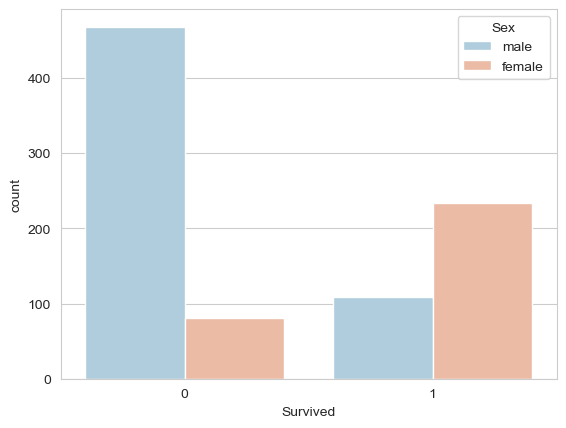

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

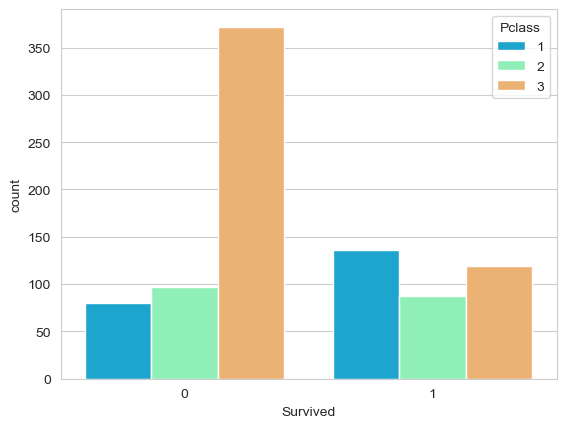

In [11]:
sns.set_style('whitegrid')
df['Pclass'] = df['Pclass'].astype(str)
sns.countplot(x = 'Survived',hue='Pclass',data=df,palette='rainbow',hue_order=['1','2','3'])

# Displots

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


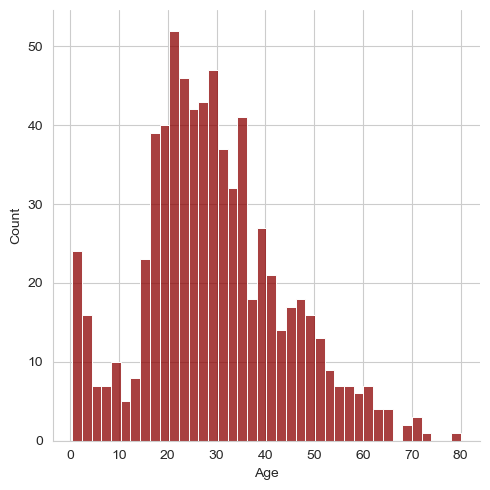

In [12]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

# Histograms

<Axes: >

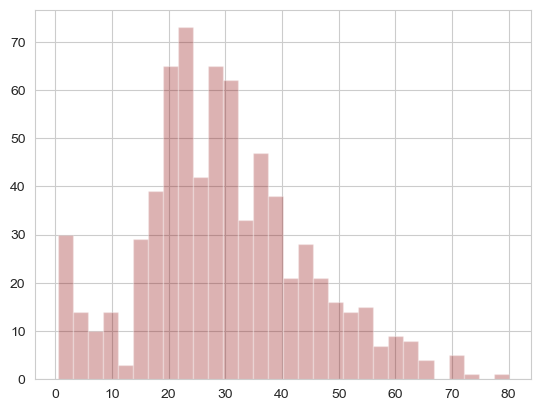

In [13]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

In [ ]:
# Countplots for number of siblings and spouse 

<Axes: xlabel='SibSp', ylabel='count'>

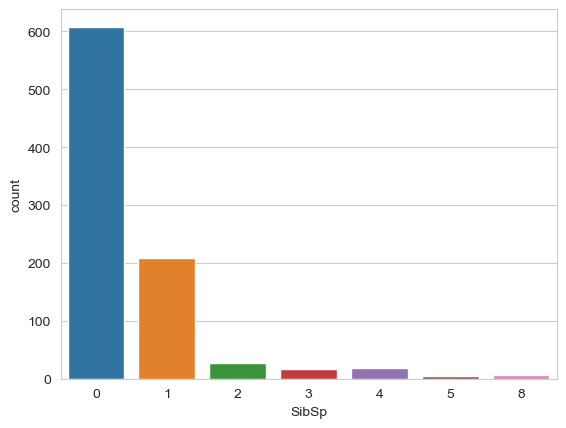

In [14]:
sns.countplot(x="SibSp",data=df)

# Histogram for fare

<Axes: >

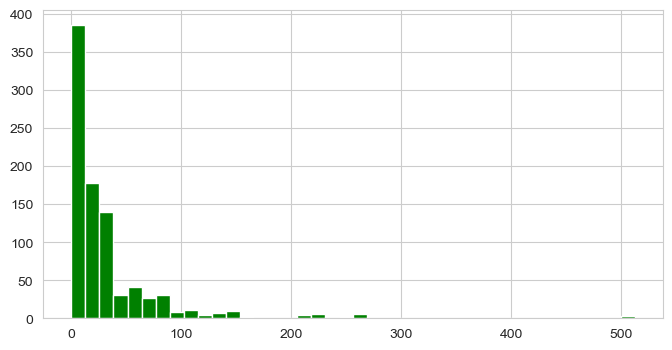

In [15]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data cleaning

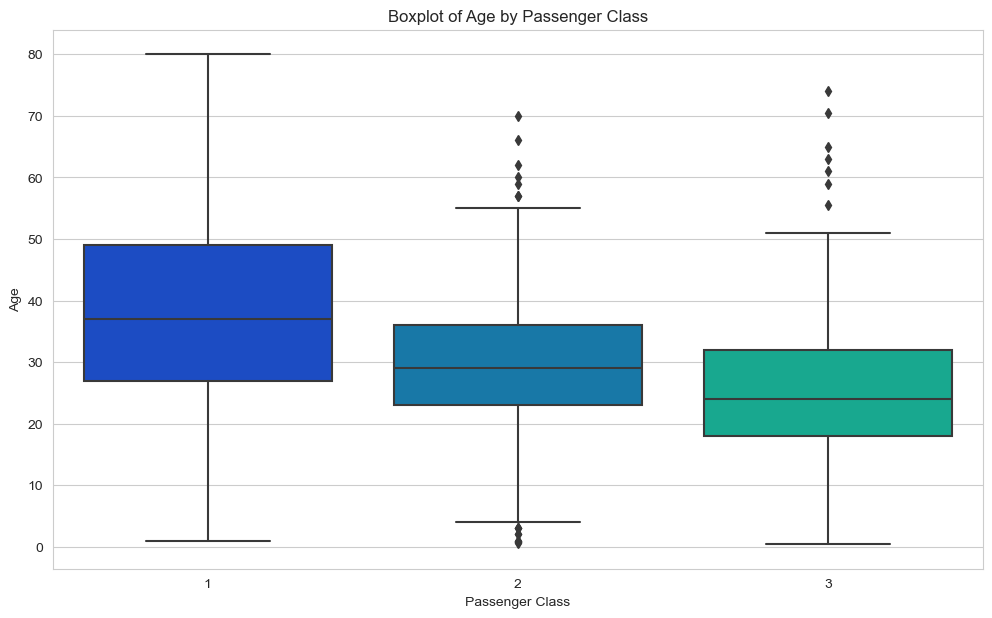

In [16]:
df['Pclass'] = df['Pclass'].astype(int)
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter',order=[1,2,3])
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Boxplot of Age by Passenger Class')
plt.show()

# Imputation of null values

 Function for filling null values with averages

In [64]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

The function is applied with the help of .apply 

<Axes: >

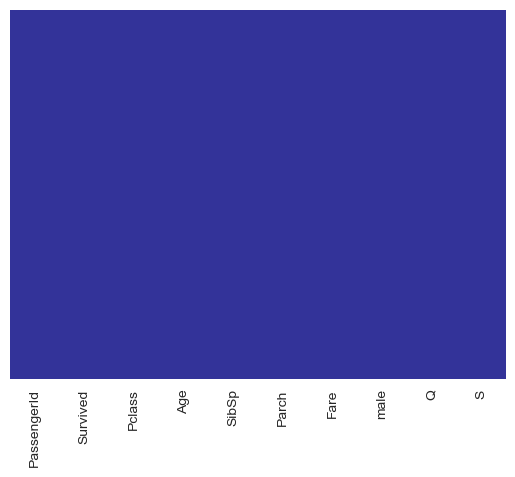

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='terrain')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [82]:
df.dropna(inplace=True)

# Converting Categorical Features

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int32  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    bool   
 8   Q            889 non-null    bool   
 9   S            889 non-null    bool   
dtypes: bool(3), float64(2), int32(1), int64(4)
memory usage: 54.7 KB


In [85]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

KeyError: 'Sex'

In [86]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [87]:
df = pd.concat([df,sex,embark],axis=1)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


# Train Test Split

In [89]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True,True,False,True


In [90]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30,random_state=101)

# Training and Predicting

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

In [93]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [94]:
predictions = logmodel.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
accuracy=confusion_matrix(y_test,predictions)

In [97]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8239700374531835

In [100]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Evaluation

In [101]:
from sklearn.metrics import classification_report

In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

